<a href="https://colab.research.google.com/github/sowmy3010/Predictive-Analytics/blob/main/FeedbackAndMotivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **Loading the Data**

In [2]:
# Load the data
data = pd.read_csv('Feedback and Motivation 300.csv')

# **Data Preprocessing**
    Enhances data quality and prepares it for analysis by applying various technique.

In [3]:
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})
data['gender'] = data['gender'].astype('int64')
data = data.drop('Timestamp', axis=1)
data=data.drop('Email Address',axis=1)
data=data.drop('program_of_study',axis=1)
data=data.drop('age',axis=1)

In [4]:
data['motivation']=data['m_motivated']+data['m_challenge']+data['m_enthusiastic']+data['m_confident']+data['m_control']+data['m_effort']+data['m_seek_feedback']+data['m_helpful']+data['m_satisfaction']+data['m_continue_journey']
X = data[['gender','f_confidence','f_clear','f_gap','f_specific','f_focus','f_time','f_detailed','f_tone','f_helpful','f_likely_seek']] 
y = data['motivation'] # Dependent variable
X = sm.add_constant(X)

# **Multiple Regression**
    A statistical technique used to analyze the relationship between a dependent variable and multiple independent variables in order to predict or explain the variability in the dependent variable.

In [5]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             motivation   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     52.93
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           3.37e-68
Time:                        18:55:55   Log-Likelihood:                -1106.9
No. Observations:                 369   AIC:                             2238.
Df Residuals:                     357   BIC:                             2285.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4747      1.120      6.675

# **Cook's Distance**

```
 A measure used to identify influential data points in regression analysis.
```



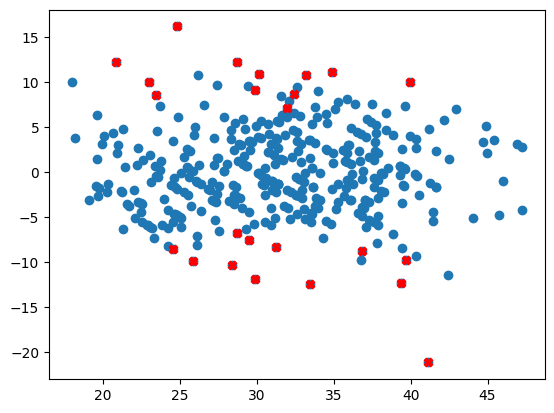

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt

residuals = model.resid
plt.scatter(model.predict(), residuals)

# Calculate Cook's distance
influence = OLSInfluence(model)
(cooks_d, _) = influence.cooks_distance

# Identify outliers with Cook's distance greater than 4/n
n = len(X)
outliers = [i for i, d in enumerate(cooks_d) if d > 4/n]

# Add markers for the outliers
plt.scatter(model.predict()[outliers], residuals[outliers], marker='X', color='red')

# Show the plot
plt.show()


In [7]:

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Calculate Cook's distance
influence = OLSInfluence(model)
(cooks_d, _) = influence.cooks_distance

# Identify outliers with Cook's distance greater than 4/n
n = len(X)
outliers = [i for i, d in enumerate(cooks_d) if d > 4/n]
print('Outliers:', outliers)

# remove outliers from X and y
X = X[~X.index.isin(outliers)]
y = y[~y.index.isin(outliers)]

# remove any remaining missing values
X = X.dropna()
y = y[X.index]

# Fit a new regression model with the cleaned dataset
model = sm.OLS(y,X).fit()
print(model.summary())

Outliers: [10, 29, 36, 61, 62, 64, 73, 80, 83, 103, 109, 139, 160, 165, 171, 173, 181, 189, 196, 246, 269, 318, 330, 351]
                            OLS Regression Results                            
Dep. Variable:             motivation   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     77.79
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           4.55e-85
Time:                        18:56:08   Log-Likelihood:                -973.45
No. Observations:                 345   AIC:                             1971.
Df Residuals:                     333   BIC:                             2017.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------

# **Backward Elimination Method**
          -- Feature Subset Selection Technique
             -- Systematically eliminates non-significant features from a multiple regression model based on their p-values to improve model efficiency and interpretability.

In [8]:
# Create a model with all features
model = sm.OLS(y, X).fit()

# Get the p-values of all the features
p_values = model.pvalues
# Backward elimination loop
while p_values.max() > 0.05:
    # Find the feature with the highest p-value
    feature_to_remove = p_values.argmax()
    # Remove the feature from X and update the model
    X = X.drop(X.columns[feature_to_remove],axis=1)
    model = sm.OLS(y, X).fit()
    
    # Get the p-values of the remaining features
    p_values = model.pvalues
    
# Print the final model summary
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             motivation   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     94.22
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           2.86e-86
Time:                        18:56:15   Log-Likelihood:                -975.31
No. Observations:                 345   AIC:                             1971.
Df Residuals:                     335   BIC:                             2009.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.4771      0.907      7.145

# **Variation Inflation Factor**
     To measure the multicollinearity between independent variables, indicating how much the variance of an estimated regression coefficient is increased due to collinearity.

In [9]:
# Calculate Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor       features
0   16.474503          const
1    1.468126   f_confidence
2    1.843727        f_clear
3    1.497811     f_specific
4    1.677589        f_focus
5    1.454679         f_time
6    1.586291     f_detailed
7    1.532102         f_tone
8    1.754504      f_helpful
9    1.573789  f_likely_seek


# **Training And Test Set**
    The training set trains the model on labelled data, while the test set assesses the model's performance on unseen data.

In [16]:
# Import the necessary library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Calculate the R-squared score on the training data
r_squared = regressor.score(X_train, y_train)

# Print the R-squared score
print("R-squared:", r_squared)

R-squared: 0.732439920052056


In [18]:
# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model using the testing data
regressor.fit(X_test, y_test)

# Calculate the R-squared value for the model
r_squared = regressor.score(X_test, y_test)

# Print the R-squared value
print("R-squared:", r_squared)


R-squared: 0.6803638703829973


In [19]:
# Import necessary libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Predict on the training set
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = sqrt(train_mse)

# Predict on the test set
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = sqrt(test_mse)

# Print evaluation metrics for the training set
print("Train set R-squared: {:.3f}".format(train_r2))
print("Train set MSE: {:.3f}".format(train_mse))
print("Train set MAE: {:.3f}".format(train_mae))
print("Train set RMSE: {:.3f}".format(train_rmse))

# Print evaluation metrics for the test set
print("Test set R-squared: {:.3f}".format(test_r2))
print("Test set MSE: {:.3f}".format(test_mse))
print("Test set MAE: {:.3f}".format(test_mae))
print("Test set RMSE: {:.3f}".format(test_rmse))


Train set R-squared: 0.730
Train set MSE: 17.050
Train set MAE: 3.401
Train set RMSE: 4.129
Test set R-squared: 0.635
Test set MSE: 15.358
Test set MAE: 3.149
Test set RMSE: 3.919


# **Heatmap**
    A visual summary of the data patterns and relationships

<Axes: >

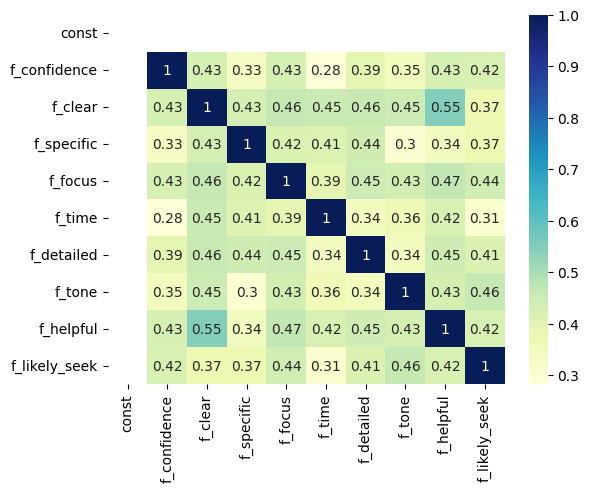

In [ ]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# **Conclusion**
    

```
The regression models demonstrated relatively good performance in predicting student motivation. 
```



```
 The R-squared values indicate that the models can explain approximately 71.9% (train set) and 60.4% (test set)of the variance 
 in student motivation.
```


```
The mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE) values provide insights into the 
accuracy of the models, with lower values indicating better performance.
```


```
Based on the results obtained, there is a significant positive relationship between the quality of feedback provided to students and their
level of motivation, indicating that feedback plays a crucial role in influencing student motivation.
```

